In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
file= 'C:/Users/Rohil/Desktop/Lab Session 1_Materials/chessboard00.png'
img = cv2.imread(file,0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=-1)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=-1)

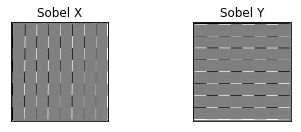

In [5]:
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

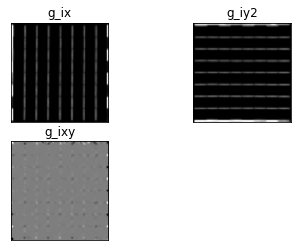

In [6]:
Ix2= sobelx*sobelx
Iy2= sobely*sobely
Ixy= sobelx*sobely
g_ix2 = cv2.GaussianBlur(Ix2,(9,9), 2)
g_iy2 = cv2.GaussianBlur(Iy2,(9,9), 2)
g_ixy= cv2.GaussianBlur(Ixy,(9,9),2)

plt.subplot(2,2,1),plt.imshow(g_ix2,cmap = 'gray')
plt.title('g_ix'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(g_iy2,cmap = 'gray')
plt.title('g_iy2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(g_ixy,cmap = 'gray')
plt.title('g_ixy'), plt.xticks([]), plt.yticks([])

plt.show()

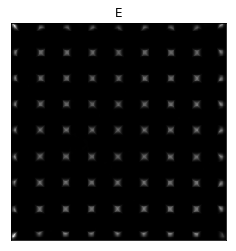

In [12]:
#Compute e

E = np.zeros((img.shape))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # summing over 3*3 windows
        sum_Ixx = np.sum(g_ix2[i:i+3,j:j+3])
        sum_Ixy = np.sum(g_ixy[i:i+3,j:j+3])
        sum_Iyy = np.sum(g_iy2[i:i+3,j:j+3])
        M = np.array([[sum_Ixx, sum_Ixy],
                      [sum_Ixy, sum_Iyy]])
        E[i,j] = min(np.linalg.eigvals(M))
        
plt.imshow(E,cmap = 'gray')
plt.title('E'), plt.xticks([]), plt.yticks([])
plt.show()

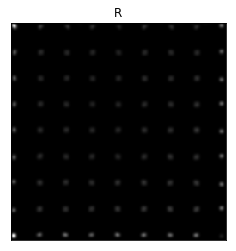

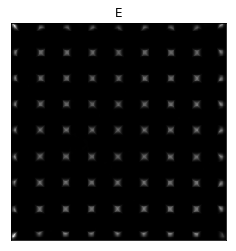

In [14]:
R = np.zeros((img.shape))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # summing over 3*3 windows
        sum_Ixx = np.sum(g_ix2[i:i+3,j:j+3])
        sum_Ixy = np.sum(g_ixy[i:i+3,j:j+3])
        sum_Iyy = np.sum(g_iy2[i:i+3,j:j+3])
        M = np.array([[sum_Ixx, sum_Ixy],
                      [sum_Ixy, sum_Iyy]])
        R[i,j] = np.linalg.det(M)- np.trace(M)
        
plt.imshow(R,cmap = 'gray')
plt.title('R'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(E,cmap = 'gray')
plt.title('E'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

E_sailent= largest_indices(E, 81)
R_sailent= largest_indices(R, 81)

x_e= []
y_e= []
for i in range(81):
    x_e.append(E_sailent[0][i])
    y_e.append(E_sailent[1][i])
    
x_r = []
y_r = []
for i in range(81):
    x_r.append(R_sailent[0][i])
    y_r.append(R_sailent[1][i])


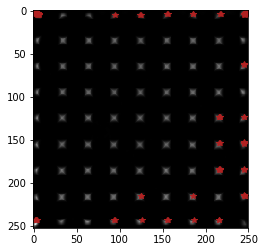

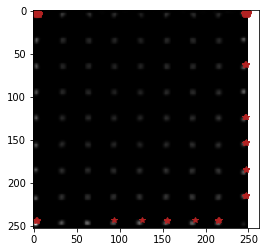

In [26]:
plt.imshow(E, cmap='gray')
plt.plot(x_e, y_e,'*', linewidth=8, color='firebrick' )
plt.show()
plt.imshow(R, cmap='gray')
plt.plot(x_r, y_r,'*', linewidth=8, color='firebrick' )
plt.show()

In [39]:
def nonmaximsupress(image, NHoodSize):

    
    dx,dy = NHoodSize
    M, N = image.shape
    for x in range(0, M-dx+1):
        for y in range(0, N-dy+1):
            window= image[x:x+dx, y:y+dy]
            if np.sum(window)==0:
                localmax=0
            else:
                localmax=np.max(window)
            maxcord= np.unravel_index(np.argmax(window), window.shape)
            window[:,:]=0
            window[maxcord]= localmax
        return image

NMS_R= nonmaximsupress(np.copy(R), (11,11))
NMS_E= nonmaximsupress(np.copy(E), (11,11))    

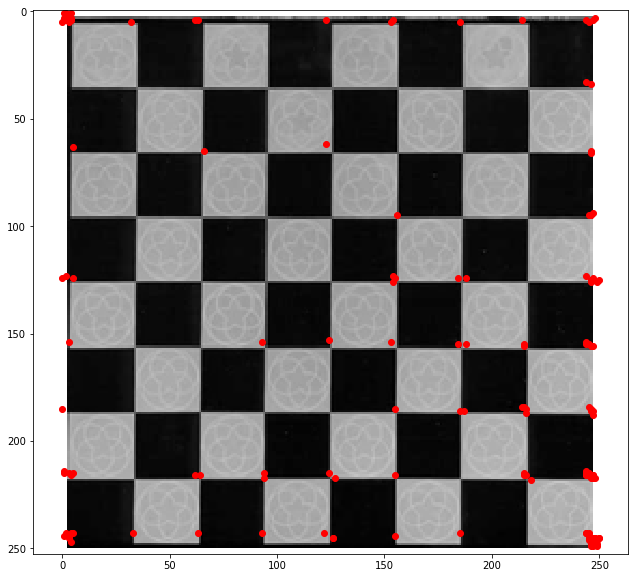

In [47]:
NMS_E_sailent= largest_indices(NMS_E, 81)
NMS_R_sailent= largest_indices(NMS_R, 81)
plt.figure(figsize=(15,10))
implot= plt.imshow(img, "gray")
plt.scatter(x= NMS_R_sailent, y= NMS_E_sailent, c='r')
plt.show()